This notebook shows how to run and visualise calibration from dark runs

In [1]:
import numpy as np
import glob
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sst1mpipe.scripts.dark_run_mes_fitter import mes_fitter

In [2]:
fitter1= mes_fitter(day          = 22,
                    month        = 3,
                    year         = 2023,
                    data_path    = '/net/',
                    tel          = 1,
                    first_file_n = 248, 
                    n_files      = 2,
                    max_evt      = 100000,
                    save_dir     = None, 
                    plot_dir     = None)

In [3]:
fitter1.do_all_fit(n_proc=8) ## will use 8 cpu processor

starting. reading data. Loading histograms.
input_path : ['/net/cs1/data/raw/2023/03/22/SST1M1/SST1M1_20230322_0248.fits.fz', '/net/cs1/data/raw/2023/03/22/SST1M1/SST1M1_20230322_0249.fits.fz']


/home/tavernier/python/sst1mpipe/sst1mpipe/io/sst1m_event_source.py:265: UserWarning: trigger_input_traces does not exist: --> nan
  warnings.warn(
/home/tavernier/python/sst1mpipe/sst1mpipe/io/sst1m_event_source.py:274: UserWarning: trigger_output_patch7 does not exist: --> nan
  warnings.warn(
/home/tavernier/python/sst1mpipe/sst1mpipe/io/sst1m_event_source.py:283: UserWarning: trigger_output_patch19 does not exist: --> nan
  warnings.warn(


23724 evts proceeded
23724 evts in histogram
Could'nt properly calibrate pixel 49 -- retrying with some parameter fixed
Could'nt properly calibrate pixel 265 -- retrying with some parameter fixed
Could'nt properly calibrate pixel 219 -- retrying with some parameter fixed
Could'nt properly calibrate pixel 148 -- retrying with some parameter fixed
Could'nt properly calibrate pixel 208 -- retrying with some parameter fixed
Could'nt properly calibrate pixel 137 -- retrying with some parameter fixed
Could'nt properly calibrate pixel 196 -- retrying with some parameter fixed
Could'nt properly calibrate pixel 90 -- retrying with some parameter fixed
Could'nt properly calibrate pixel 54 -- retrying with some parameter fixed
Could'nt properly calibrate pixel 282 -- retrying with some parameter fixed
Could'nt properly calibrate pixel 320 -- retrying with some parameter fixed
Could'nt properly calibrate pixel 154 -- retrying with some parameter fixed
Could'nt properly calibrate pixel 131 -- retry

One can plot the fitted parameter distribution

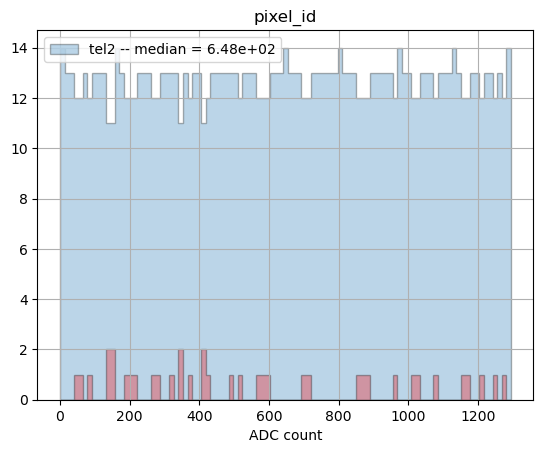

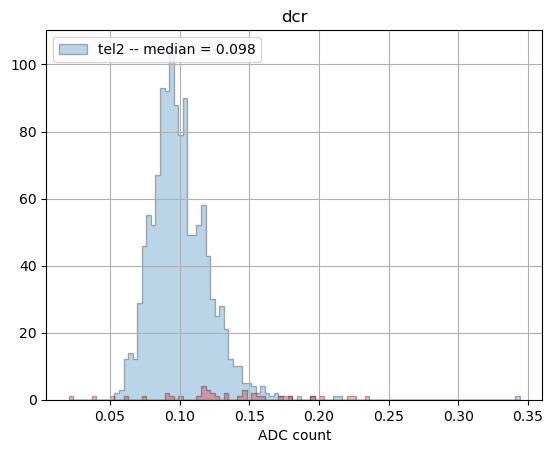

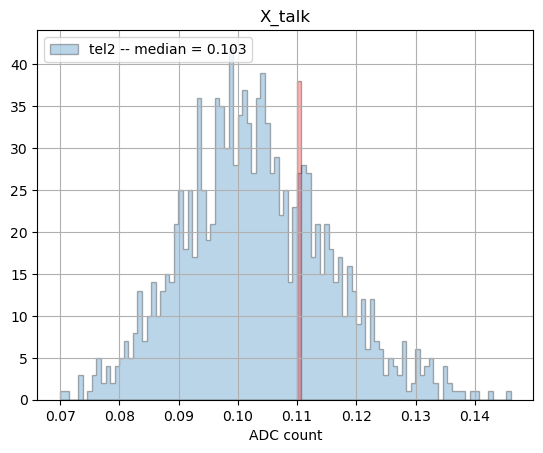

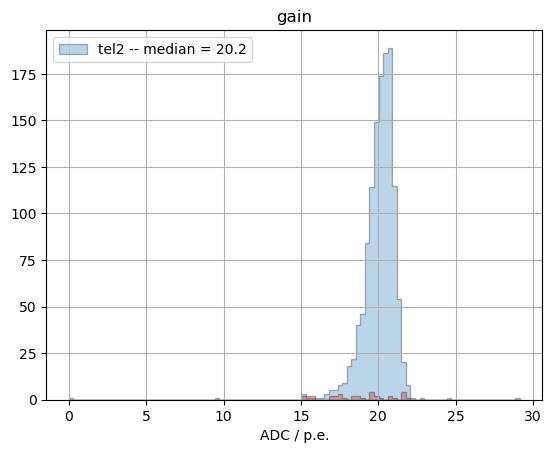

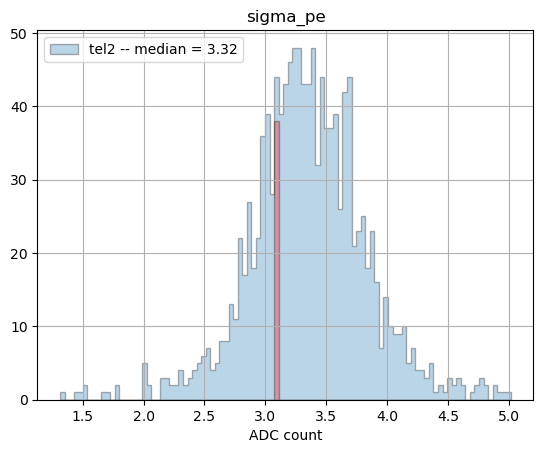

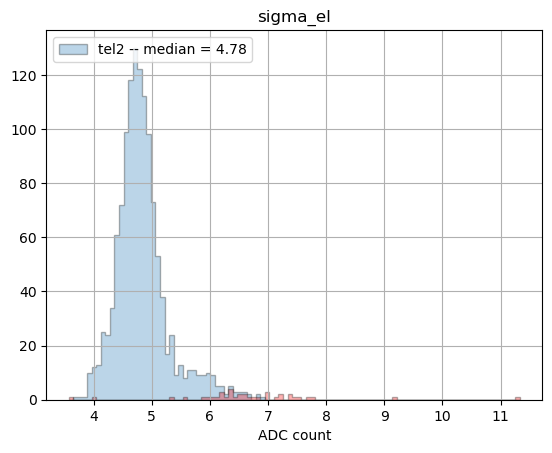

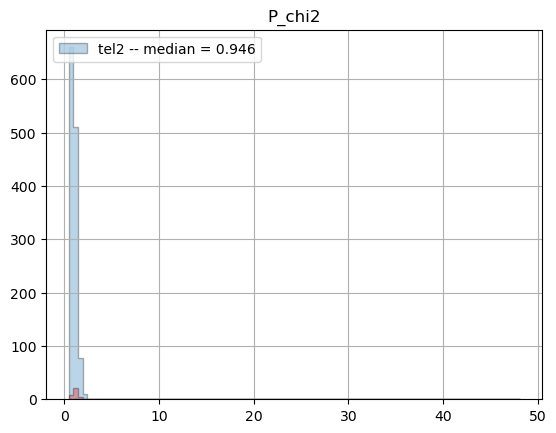

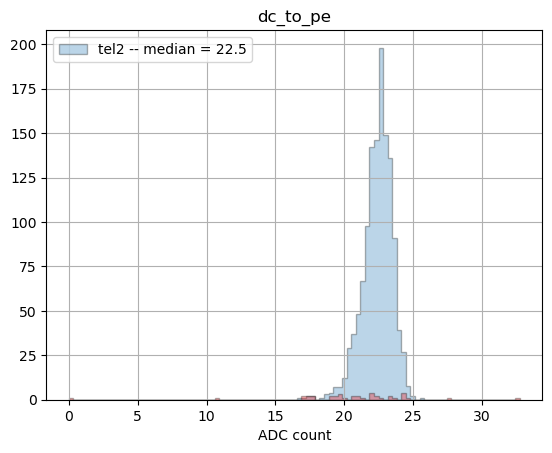

In [4]:
fitter1.plot_param_dist(show_uncal=True)

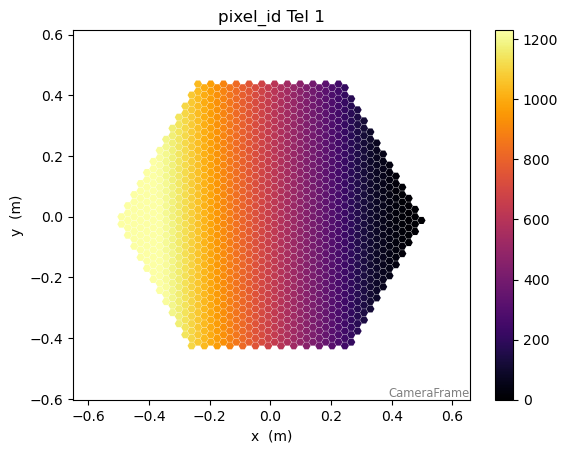

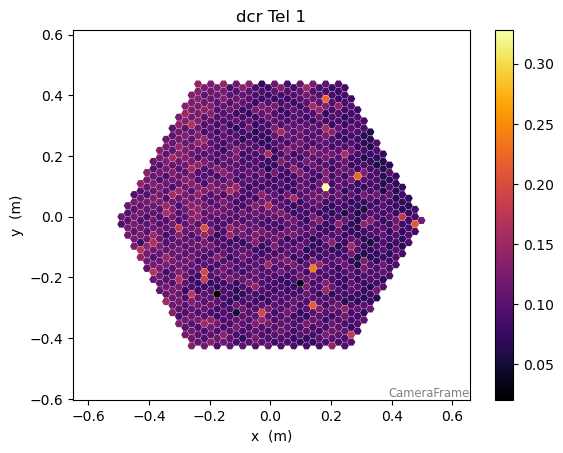

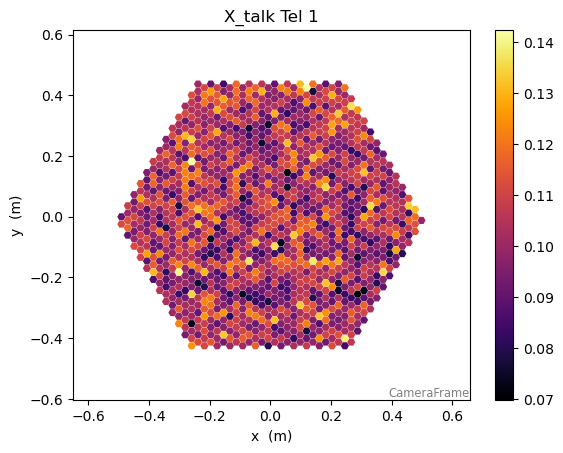

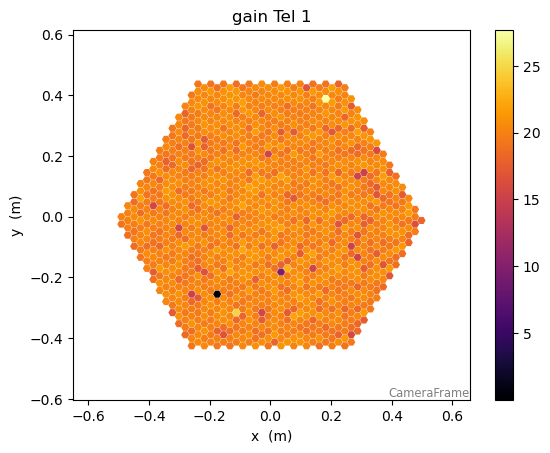

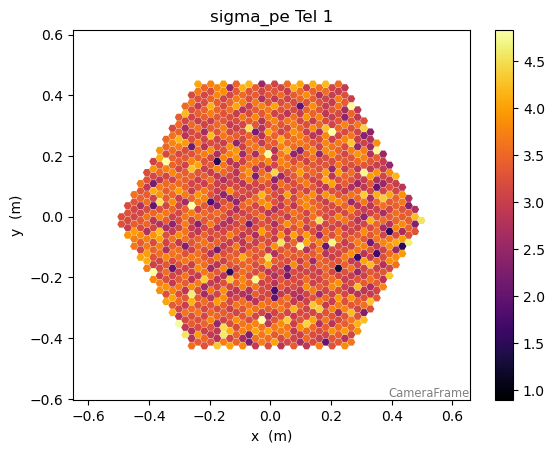

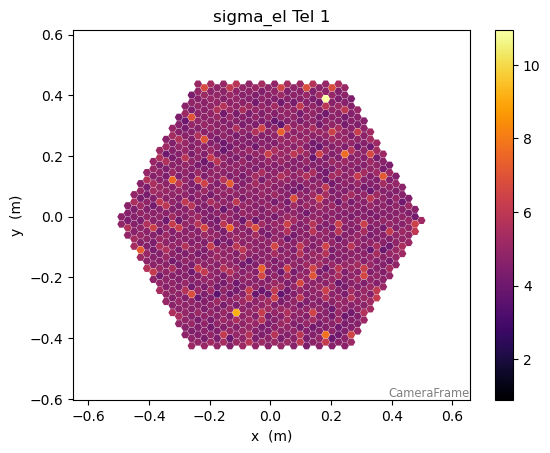

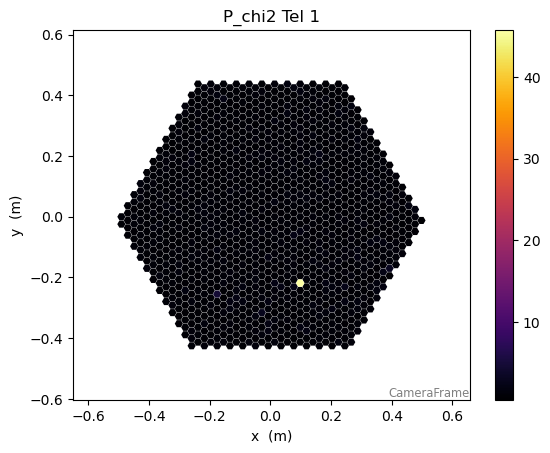

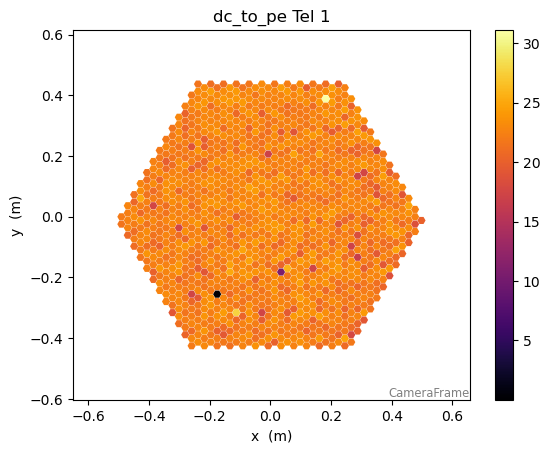

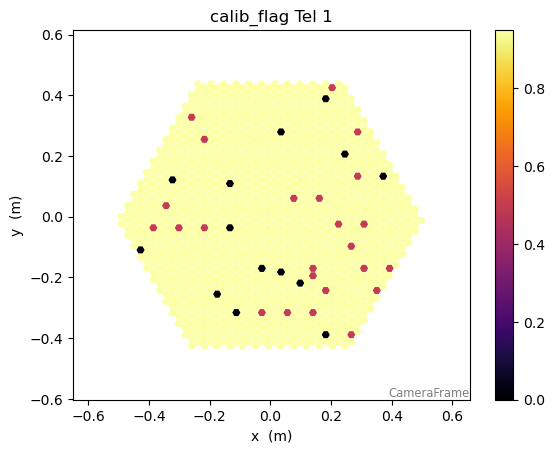

In [5]:
fitter1.plot_cam_dist()

In [6]:
fitter1.res ## df table with results

,pixel_id,dcr,X_talk,gain,sigma_pe,sigma_el,P_chi2,dc_to_pe,calib_flag
0,0,0.120295,0.099146,18.102746,4.547501,5.206703,0.626709,20.095098,1.0
1,1,0.087239,0.131478,19.485535,2.732264,4.647982,1.627415,22.435278,1.0
2,2,0.086306,0.118933,19.762872,4.217950,4.166485,1.299150,22.430614,1.0
3,3,0.212137,0.113315,16.483994,2.311346,6.382819,0.977838,18.590578,1.0
4,4,0.084263,0.113202,19.799180,3.276979,6.009047,0.769212,22.326604,1.0
...,...,...,...,...,...,...,...,...,...
1291,1291,0.102971,0.113744,19.959214,3.185066,4.425221,0.732076,22.520817,1.0
1292,1292,0.120454,0.117274,19.985505,3.002161,5.637577,0.761932,22.640673,1.0
1293,1293,0.117064,0.090469,18.883331,3.901865,4.892961,0.860550,20.761621,1.0
1294,1294,0.113768,0.090610,20.070225,3.229446,4.743649,1.042261,22.069988,1.0


apply some filter

In [7]:
fitter1.res[fitter1.res['calib_flag']!=1]

,pixel_id,dcr,X_talk,gain,sigma_pe,sigma_el,P_chi2,dc_to_pe,calib_flag
49,49,0.092454,0.11,21.520432,3.1,5.370846,2.986179,24.180261,0.5
54,54,0.062533,0.11,21.656798,3.1,7.138711,0.680000,24.333481,0.0
90,90,0.120251,0.11,19.039094,3.1,6.049371,1.584849,21.392241,0.5
131,131,0.134305,0.11,17.781023,3.1,6.321575,1.604036,19.978678,0.5
137,137,0.122679,0.11,17.541295,3.1,6.251840,1.393376,19.709320,0.5
148,148,0.092960,0.11,21.838172,3.1,6.232543,1.079302,24.537272,0.5
154,154,0.223623,0.11,15.262468,3.1,6.180288,1.159456,17.148840,0.5
196,196,0.151993,0.11,15.276024,3.1,5.878054,1.013299,17.164072,0.5
208,208,0.178010,0.11,15.830431,3.1,6.475665,1.071894,17.787001,0.5
219,219,0.160669,0.11,19.455918,3.1,7.675189,1.065337,21.860582,0.0


One ca look at the histogram and fit of a sigle pixel

pixel_id      888.000000
dcr             0.088939
X_talk          0.103253
gain           20.435391
sigma_pe        3.016670
sigma_el        5.095036
P_chi2          1.548567
dc_to_pe       22.788349
calib_flag      1.000000
Name: 888, dtype: float64


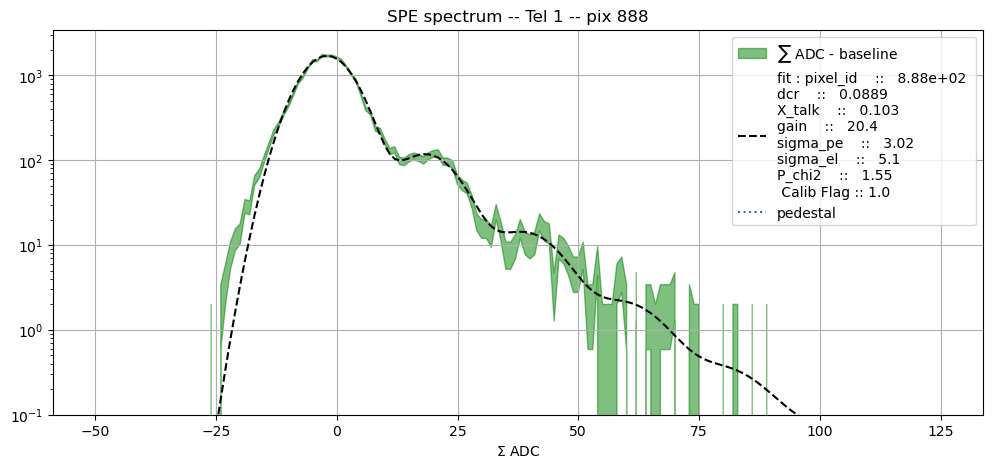

In [10]:
f=fitter1.plot_onepix(888)

In [11]:
fitter1.res[fitter1.res['gain']<16].sort_values(by=["gain"])

,pixel_id,dcr,X_talk,gain,sigma_pe,sigma_el,P_chi2,dc_to_pe,calib_flag
958,958,0.020565,0.110000,0.000006,3.100000,3.575413,4.641564,0.000007,0.0
595,595,0.118768,0.110000,9.439365,3.100000,4.005711,0.746848,10.606028,0.0
1101,1101,0.173305,0.134668,15.070970,4.636915,6.790751,0.826337,17.416406,1.0
124,124,0.129663,0.131993,15.242896,4.727334,5.316550,1.068285,17.560792,1.0
154,154,0.223623,0.110000,15.262468,3.100000,6.180288,1.159456,17.148840,0.5
165,165,0.060133,0.076483,15.275365,1.662517,4.826806,1.939245,16.540431,1.0
196,196,0.151993,0.110000,15.276024,3.100000,5.878054,1.013299,17.164072,0.5
651,651,0.159378,0.097601,15.377546,4.797241,6.330061,1.211325,17.040739,1.0
709,709,0.194521,0.110000,15.471592,3.100000,6.124451,2.710786,17.383811,0.5
415,415,0.236185,0.110000,15.518361,3.100000,6.494643,0.975413,17.436360,0.5


This allow to look at minuit output

pixel_id      289.000000
dcr             0.091865
X_talk          0.098443
gain           20.932440
sigma_pe        3.036350
sigma_el        5.192038
P_chi2          1.290260
dc_to_pe       23.218104
calib_flag      1.000000
Name: 289, dtype: float64


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 701.4                      │              Nfcn = 679              │
│ EDM = 2.43e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ l        │  0.0919   │  0.0014   │  -0.0014   │   0.0014   │  1e-05  │   0.6   │       │
│ 1 │ xt       │   0.098   │   0.006   │   -0.006   │   0.006    │  1e-05  │   0.3   │       │
│ 2 │ g        │   20.93   │   0.16    │   -0.16    │    0.16    │    0    │   40    │       │
│ 3 │ sigma_pe │   3.04    │   0.22    │   -0.22    │    0.22    │    0    │    6    │       │
│ 4 │ sigma_el │   5.192   │   0.025   │   -0.024   │   0.025    │    0    │   20    │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           l           │          xt           │           g           │       sigma_pe        │       sigma_el        │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.0014  │  0.0014   │  -0.006   │   0.006   │   -0.16   │   0.16    │   -0.22   │   0.22    │  -0.024   │   0.025   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         l        xt         g  sigma_pe  sigma_el │
├──────────┼───────────────────────────────────────────────────┤
│        l │  1.91e-06 -2.21e-06 -0.000122  0.000158 -1.18e-05 │
│       xt │ -2.21e-06  3.11e-05 -0.000157 -0.000126  4.62e-06 │
│        g │ -0.000122 -0.000157    0.0259    -0.018   0.00157 │
│ sigma_pe │  0.000158 -0.000126    -0.018     0.049  -0.00231 │
│ sigma_el │ -1.18e-05  4.62e-06   0.00157  -0.00231  0.000603 │
└──────────┴───────────────────────────────────────────────────┘

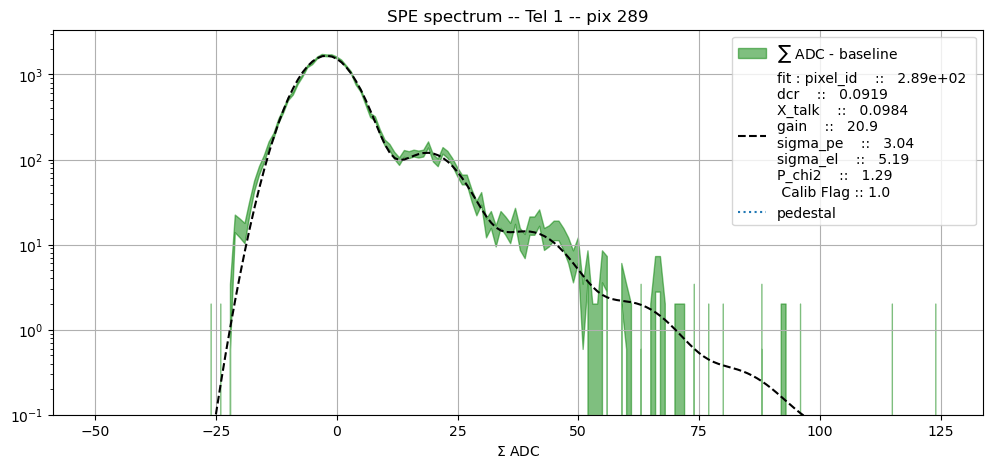

In [12]:
pix = 289

f=fitter1.plot_onepix(pix)
fitter1.aspe_fit(pix)
fitter1.minuit.minos()
fitter1.minuit

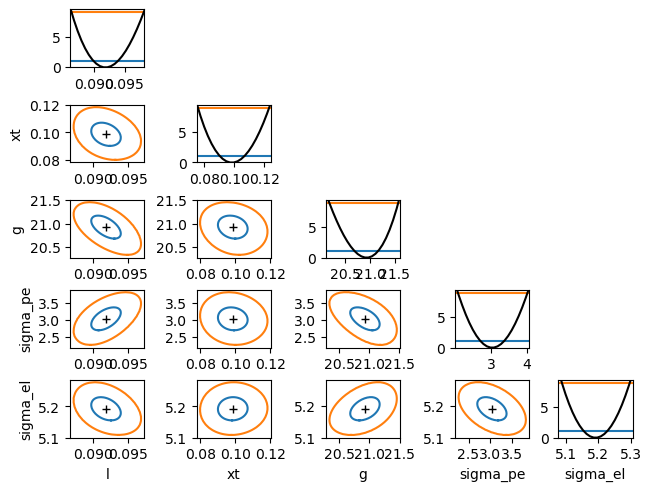

In [13]:
f=fitter1.minuit.draw_mnmatrix(cl=[1, 3])

One can also rerun the fit

In [15]:
pix = 214
fitter1.aspe_fit(pix)
#fitter2.minuit.minos()
fitter1.minuit.reset()
fitter1.minuit.fixed['xt']=True
fitter1.minuit.fixed['sigma_pe']=False
fitter1.minuit.migrad()
fitter1.minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 617.2                      │              Nfcn = 428              │
│ EDM = 3.05e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ l        │  0.0697   │  0.0011   │  -0.0010   │   0.0011   │  1e-05  │   0.6   │       │
│ 1 │ xt       │  0.1100   │  0.0011   │            │            │  1e-05  │   0.3   │  yes  │
│ 2 │ g        │   18.28   │   0.14    │   -0.14    │    0.13    │    0    │   40    │       │
│ 3 │ sigma_pe │   2.42    │   0.18    │   -0.18    │    0.18    │    0    │    6    │       │
│ 4 │ sigma_el │   4.243   │   0.017   │   -0.017   │   0.017    │    0    │   20    │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           l           │           g           │       sigma_pe        │       sigma_el        │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.0010  │  0.0011   │   -0.14   │   0.13    │   -0.18   │   0.18    │  -0.017   │   0.017   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         l        xt         g  sigma_pe  sigma_el │
├──────────┼───────────────────────────────────────────────────┤
│        l │  1.11e-06         0 -8.07e-05   8.7e-05 -5.56e-06 │
│       xt │         0         0         0         0         0 │
│        g │ -8.07e-05         0    0.0186   -0.0123  0.000768 │
│ sigma_pe │   8.7e-05         0   -0.0123    0.0335  -0.00116 │
│ sigma_el │ -5.56e-06         0  0.000768  -0.00116  0.000291 │
└──────────┴───────────────────────────────────────────────────┘